In [45]:
import numpy as np
import pandas as pd
from scipy import stats 
import matplotlib.pyplot as plt
%matplotlib inline

In [46]:
data=pd.read_csv('https://covid.ourworldindata.org/data/owid-covid-data.csv')
data_india=data[data['location']=='India'] #Extracting rows that has location 'India'
data_india.tail()

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,tests_units,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
13537,IND,Asia,India,2020-07-18,1038716.0,34884.0,26273.0,671.0,752.690,25.278,19.038,0.486,13433742.0,361024.0,9.735,0.262,303820.0,0.220,samples tested,NaN,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66
13538,IND,Asia,India,2020-07-19,1077618.0,38902.0,26816.0,543.0,780.880,28.190,19.432,0.393,13791869.0,358127.0,9.994,0.260,314959.0,0.228,samples tested,NaN,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66
13539,IND,Asia,India,2020-07-20,1118043.0,40425.0,27497.0,681.0,810.174,29.293,19.925,0.493,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66
13540,IND,Asia,India,2020-07-21,1155191.0,37148.0,28084.0,587.0,837.092,26.919,20.351,0.425,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66
13541,IND,Asia,India,2020-07-22,1164183.0,8992.0,28732.0,648.0,843.608,6.516,20.820,0.470,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66


In [47]:
data_india_numeric=data_india.select_dtypes(include=['float64']) #extracting all numerical columns

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


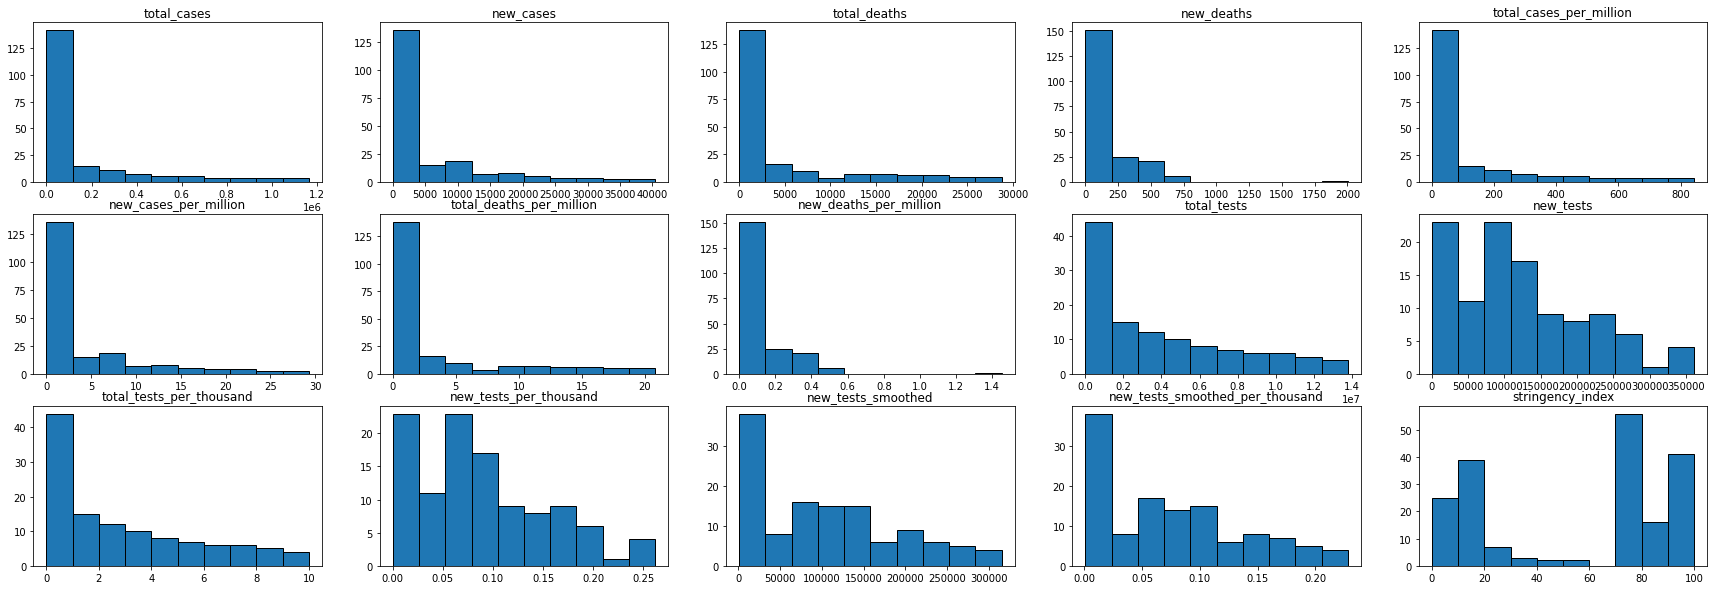

In [48]:
#plotting histogramsn of all numerical columns
diag=plt.figure(1,figsize=(30,10))
nunique=data_india_numeric.apply(pd.Series.nunique)
col_drop=nunique[nunique==1].index
data_plot=data_india_numeric.drop(col_drop,axis=1)
fig=[]
for i in range(0,15):
  fig.append(i)
fig_index=0
for i in range(0,3):
  for j in range(0,5):
    fig[fig_index]=plt.subplot2grid((3,5),(i,j))
    fig_index+=1
col_index=0
for i in data_plot.columns:
  fig[col_index].hist(data_plot[i],bins=10,edgecolor='black') 
  fig[col_index].set_title(i)
  col_index+=1

In [49]:
#mean, median and mode of each numerical column
for i in data_india_numeric.columns:
  mean=np.mean(data_india[i])
  median=np.median(data_india[i])
  mode=stats.mode(data_india[i])
  print(i+':\n'+'\tMean: '+str(mean)+'\n\tMedian: '+str(median)+'\n\tMode: '+str(mode[0])+'\n\n')

total_cases:
	Mean: 160274.9705882353
	Median: 7901.5
	Mode: [0.]


new_cases:
	Mean: 5706.779411764706
	Median: 852.5
	Mode: [0.]


total_deaths:
	Mean: 4515.931372549019
	Median: 256.0
	Mode: [0.]


new_deaths:
	Mean: 140.84313725490196
	Median: 32.5
	Mode: [0.]


total_cases_per_million:
	Mean: 116.14085784313725
	Median: 5.7255
	Mode: [0.]


new_cases_per_million:
	Mean: 4.135338235294118
	Median: 0.6180000000000001
	Mode: [0.]


total_deaths_per_million:
	Mean: 3.2724068627450977
	Median: 0.1855
	Mode: [0.]


new_deaths_per_million:
	Mean: 0.10204411764705885
	Median: 0.0235
	Mode: [0.]


total_tests:
	Mean: 4005175.111111111
	Median: nan
	Mode: [6500.]


new_tests:
	Mean: 123035.86486486487
	Median: nan
	Mode: [157.]


total_tests_per_thousand:
	Mean: 2.9023247863247863
	Median: nan
	Mode: [0.01]


new_tests_per_thousand:
	Mean: 0.08915315315315317
	Median: nan
	Mode: [0.001]


new_tests_smoothed:
	Mean: 104539.8606557377
	Median: nan
	Mode: [1125.]


new_tests_smoothed_per_thous

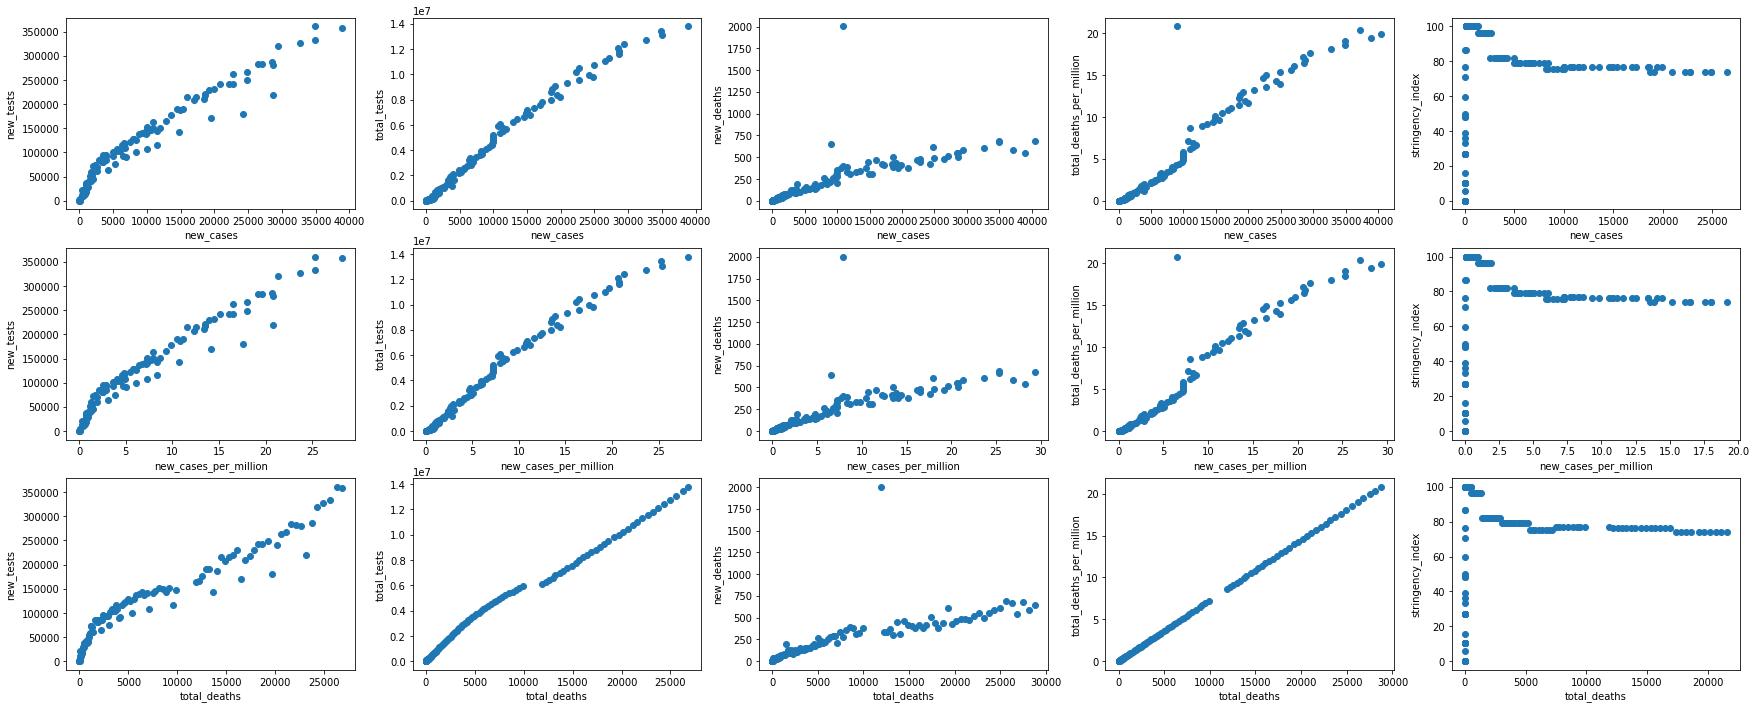

In [50]:
#scatter plot
diag1=plt.figure(2,figsize=(30,12))
fig1=[]
for i in range(0,15):
  fig1.append(i)
fig_index=0
for i in range(0,3):
  for j in range(0,5):
    fig1[fig_index]=plt.subplot2grid((3,5),(i,j))
    fig_index+=1
col_index=0
data_plot=data_india[['new_cases','new_cases_per_million','total_deaths']]
columns=['new_tests','total_tests','new_deaths','total_deaths_per_million','stringency_index']
for i in data_plot.columns:
  for j in columns:
    fig1[col_index].scatter(data_india[i],data_india[j])
    fig1[col_index].set_xlabel(i)
    fig1[col_index].set_ylabel(j)
    col_index+=1

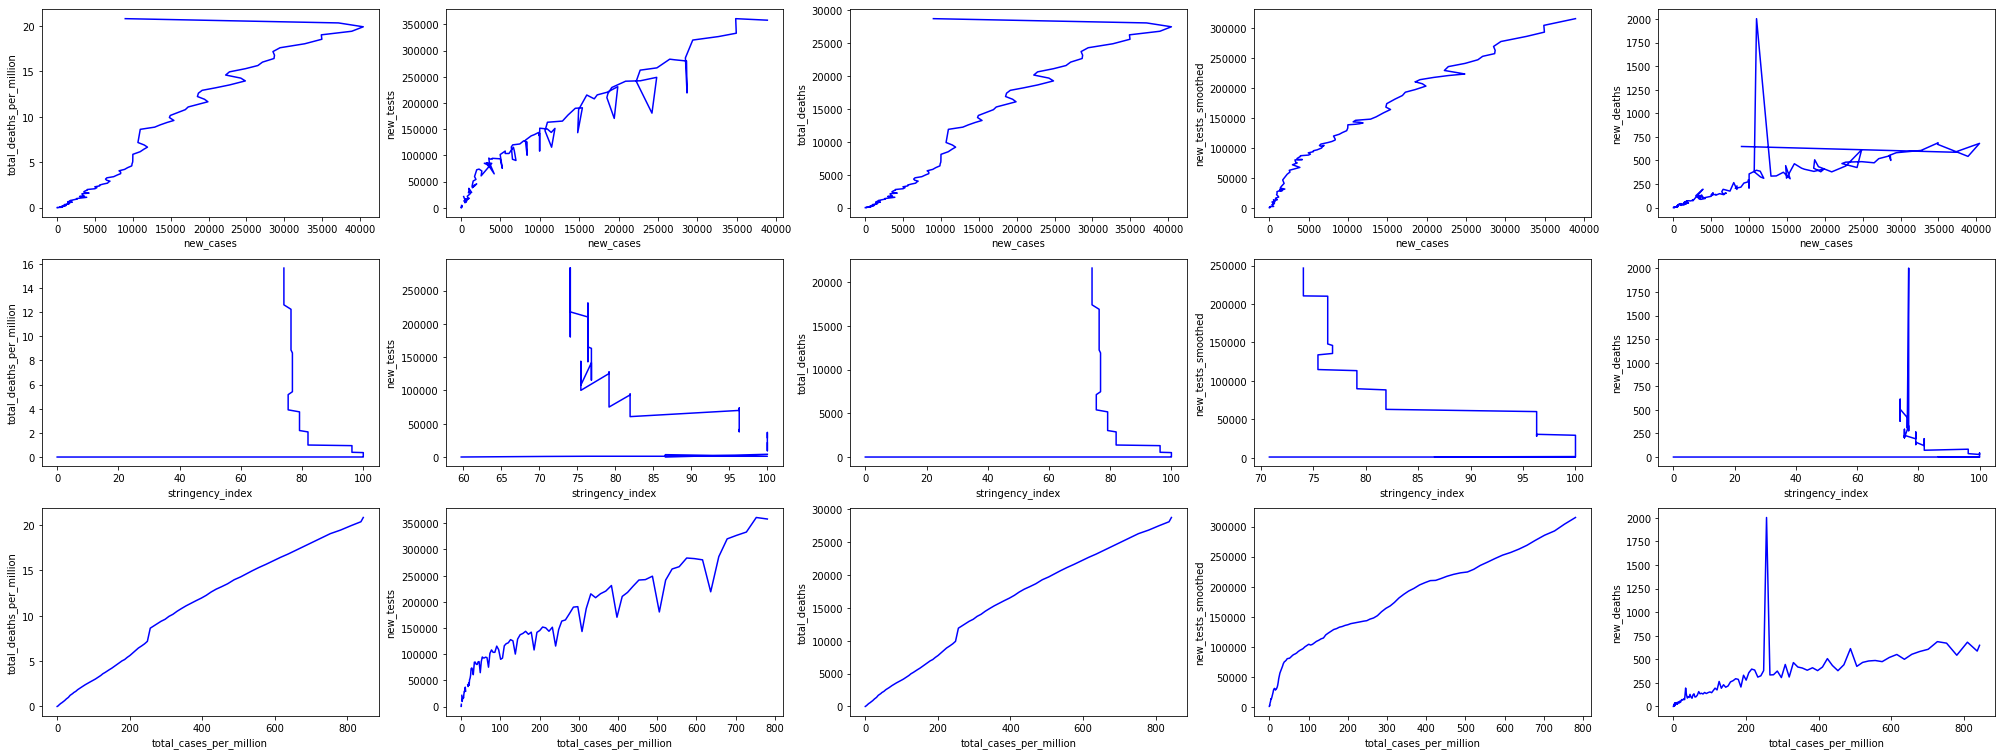

In [51]:
#line plot
diag2=plt.figure(3,figsize=(35,13))
fig2=[]
for i in range(0,15):
  fig2.append(i)
fig_index=0
for i in range(0,3):
  for j in range(0,5):
    fig2[fig_index]=plt.subplot2grid((3,5),(i,j))
    fig_index+=1
col_index=0
columns=['total_deaths_per_million','new_tests','total_deaths','new_tests_smoothed','new_deaths']
data_plot=data_india[['new_cases','stringency_index','total_cases_per_million']]
for i in data_plot.columns:
  for j in columns:
      fig2[col_index].plot(data_india[i],data_india[j],color='blue')
      fig2[col_index].set_xlabel(i)
      fig2[col_index].set_ylabel(j)
      col_index+=1

In [52]:
#handling missing values
for i in data_india_numeric.columns: #data_india_numeric contains all numerical columns
  data_india[i]=data_india[i].fillna(data_india[i].mean()) #Replacing null values in a column by mean value
data_india['tests_units']=data_india['tests_units'].fillna('samples tested') #Replacing categorical column by their mode

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [53]:
new_data=data_india.iloc[data_india.shape[0]-1:,:] #Removing last row which will be given as new data for prediction
data_india=data_india.iloc[:data_india.shape[0]-1,:] 
data_india.shape

(203, 34)

In [54]:
import datetime as dt
data_india['date']=pd.to_datetime(data_india['date']) #converting date to ordinal
data_india['date']=data_india['date'].map(dt.datetime.toordinal)

In [55]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as MSE

data_india_for_model=data_india.select_dtypes(exclude=['object']) 
Y=data_india_for_model['total_cases']
X=data_india_for_model.drop(columns=['total_cases'],axis=1) # X includes date column

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,random_state=42,test_size=0.3)

model=LinearRegression()  
model.fit(X_train,Y_train)  
Y_predict=model.predict(X_test)       #Linear Regression for 29 columns
print('(Accuracy)R2 score:{}'.format(r2_score(Y_test,Y_predict)))
print('RMSE value:{}'.format(MSE(Y_test,Y_predict)**(1/2)))

(Accuracy)R2 score:0.9999999999981832
RMSE value:0.3682924393082809


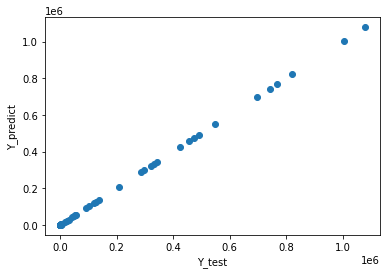

In [56]:
plt.scatter(Y_test,Y_predict)
plt.xlabel('Y_test')
plt.ylabel('Y_predict')
plt.show()

In [57]:
from sklearn.ensemble import RandomForestRegressor

rf_model=RandomForestRegressor(n_estimators=800,random_state=21)

rf_model.fit(X_train,Y_train)
pred=rf_model.predict(X_test) #Random Forest Regression for 29 columns
print('(Accuracy)R2_score:{}'.format(r2_score(Y_test,pred)))
print('RMSE value:{}'.format(MSE(Y_test,pred)**(1/2)))

(Accuracy)R2_score:0.9983588843260187
RMSE value:11069.152658024897


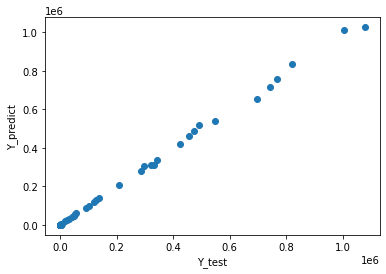

In [58]:
plt.scatter(Y_test,pred)
plt.xlabel('Y_test')
plt.ylabel('Y_predict')
plt.show()

In [59]:
new_data

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,tests_units,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
13541,IND,Asia,India,2020-07-22,1164183.0,8992.0,28732.0,648.0,843.608,6.516,20.82,0.47,4.005175e+06,123035.864865,2.902325,0.089153,104539.860656,0.075754,samples tested,55.309005,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66


In [60]:
new_data['date']=pd.to_datetime(new_data['date'])
new_data['date']=new_data['date'].map(dt.datetime.toordinal)
new_data=new_data.drop(columns=['iso_code','continent','location','tests_units','total_cases'],axis=1) #dropping all categorical columns along with 'total_cases' column

In [61]:
from datetime import datetime
result=model.predict(new_data) #using Linear Regressor
ordinal_date=new_data['date']
date=datetime.fromordinal(ordinal_date).strftime(("%x"))
result2=rf_model.predict(new_data) #using Random forest regressor
print('The total cases using linear regression on '+str(date)+' is '+str(result)) 
print('The total cases using random forest regression on '+str(date)+' is '+str(result2))

The total cases using linear regression on 07/22/20 is [1164183.83173274]
The total cases using random forest regression on 07/22/20 is [697203.01375]
